In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
train_image = cv.imread("Train_2.pgm")
train_image = train_image[:,:,0]

<IPython.core.display.Javascript object>


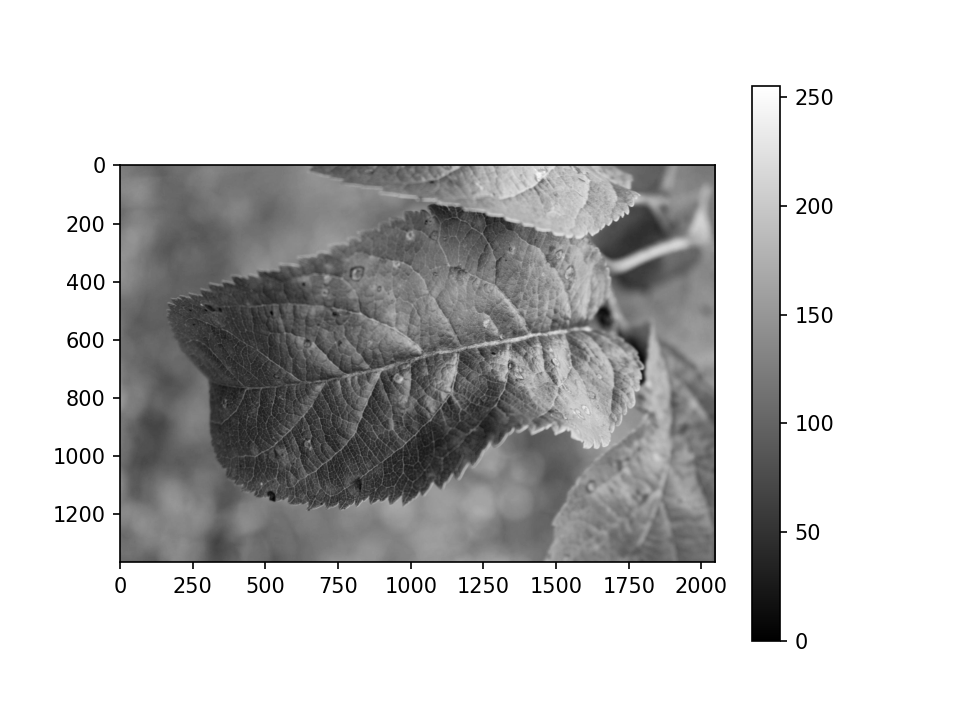

In [3]:
out=cv.normalize(train_image.astype("float"),None,0.0,255,cv.NORM_MINMAX)
plt.figure()
plt.imshow(out, cmap='gray')
plt.colorbar()
plt.show()

Average Smoothing: blur = cv.blur(img,(5,5))

Gaussian Smoothing: blur = cv.GaussianBlur(img,(5,5),0)


Moving Averages:  thresh = cv.adaptiveThreshold(train_image, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                                          cv.THRESH_BINARY, 11, 1)
                                          
Histogram: plt.figure()
plt.hist(train_image.ravel(),256,[0,256]); plt.show()
plt.show()


Normalization: out=cv.normalize(homo_filtered.astype("float"),None,0.0,255,cv.NORM_MINMAX)

Histogram Equalization: equ = cv.equalizeHist(tophat_img)

LAPLACIAN: laplacianofimage=cv.Laplacian(out,-1)

CANNY: edges = cv.Canny(img,100,200)

TOPHAT: filterSize =(15, 15)

kernel = cv.getStructuringElement(cv.MORPH_RECT,
                                   filterSize)
                                   
tophat_img = cv.morphologyEx(train_image, 
                              cv.MORPH_BLACKHAT,
                              kernel)
                              
OTSU: blur = cv.GaussianBlur(img,(5,5),0)

ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Morphological Operators

kernel = np.ones((5, 5), np.uint8)

image = cv.erode(image, kernel) 

img_dilation = cv.dilate(img, kernel, iterations=1)

opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)




# SOBEL:
filter=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
dst = cv.filter2D(out,-1,filter)

abssobelx=abs(dst)

#cv.imshow("Figure10.16-B",abssobelx)
#cv.waitKey(0)
#cv.destroyAllWindows()

plt.imshow(abssobelx,cmap="gray")
plt.title("SobelX")
plt.show()

filter=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
dsty = cv.filter2D(out,-1,filter)

abssobely=abs(dsty)

#cv.imshow("Figure10.16-C",abssobely)
#cv.waitKey(0)
#cv.destroyAllWindows()

plt.imshow(abssobely,cmap="gray")
plt.title("SobelY")
plt.show()

sobel=abssobelx+abssobely

In [4]:
import logging

# Homomorphic filter class
class HomomorphicFilter:
    """Homomorphic filter implemented with diferents filters and an option to an external filter.
    
    High-frequency filters implemented:
        butterworth
        gaussian
    Attributes:
        a, b: Floats used on emphasis filter:
            H = a + b*H
        
        .
    """
    
    def __init__(self, a = 0.5, b = 1.5):
        self.a = float(a)
        self.b = float(b)

    # Filters
    def __butterworth_filter(self, I_shape, filter_params):
        P = I_shape[0]/2
        Q = I_shape[1]/2
        U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
        Duv = (((U-P)**2+(V-Q)**2)).astype(float)
        H = 1/(1+(Duv/filter_params[0]**2)**filter_params[1])
        return (1 - H)

    def __gaussian_filter(self, I_shape, filter_params):
        P = I_shape[0]/2
        Q = I_shape[1]/2
        H = np.zeros(I_shape)
        U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
        Duv = (((U-P)**2+(V-Q)**2)).astype(float)
        H = np.exp((-Duv/(2*(filter_params[0])**2)))
        return (1 - H)

    # Methods
    def __apply_filter(self, I, H):
        H = np.fft.fftshift(H)
        I_filtered = (self.a + self.b*H)*I
        return I_filtered

    def filter(self, I, filter_params, filter='butterworth', H = None):
        
        """
        Method to apply homormophic filter on an image
        Attributes:
            I: Single channel image
            filter_params: Parameters to be used on filters:
                butterworth:
                    filter_params[0]: Cutoff frequency 
                    filter_params[1]: Order of filter
                gaussian:
                    filter_params[0]: Cutoff frequency
            filter: Choose of the filter, options:
                butterworth
                gaussian
                external
            H: Used to pass external filter
        """

        #  Validating image
        if len(I.shape) != 2:
            print(I.shape)
            raise Exception('Improper image')

        # Take the image to log domain and then to frequency domain 
        I_log = np.log1p(np.array(I, dtype="float"))
        I_fft = np.fft.fft2(I_log)

        # Filters
        if filter=='butterworth':
            H = self.__butterworth_filter(I_shape = I_fft.shape, filter_params = filter_params)
        elif filter=='gaussian':
            H = self.__gaussian_filter(I_shape = I_fft.shape, filter_params = filter_params)
        elif filter=='external':
            print('external')
            if len(H.shape) != 2:
                raise Exception('Invalid external filter')
        else:
            raise Exception('Selected filter not implemented')
        
        # Apply filter on frequency domain then take the image back to spatial domain
        I_fft_filt = self.__apply_filter(I = I_fft, H = H)
        I_filt = np.fft.ifft2(I_fft_filt)
        I = np.exp(np.real(I_filt))-1
        return np.uint8(I)
# End of class HomomorphicFilter

In [5]:
"""
homo_filter = HomomorphicFilter(a = 0.5, b = 1)
homo_filtered = homo_filter.filter(I=train_image, filter_params=[30,2])

out=cv.normalize(homo_filtered.astype("float"),None,0.0,255,cv.NORM_MINMAX)

plt.figure()
plt.imshow(out, cmap='gray')
plt.colorbar()
plt.show()
"""

'\nhomo_filter = HomomorphicFilter(a = 0.5, b = 1)\nhomo_filtered = homo_filter.filter(I=train_image, filter_params=[30,2])\n\nout=cv.normalize(homo_filtered.astype("float"),None,0.0,255,cv.NORM_MINMAX)\n\nplt.figure()\nplt.imshow(out, cmap=\'gray\')\nplt.colorbar()\nplt.show()\n'

In [89]:
out=cv.normalize(train_image.astype("float"),None,0.0,255,cv.NORM_MINMAX)
# List of 4 5x20 image slices
sliced = np.split(out,5,axis=0)

# List of 4 lists of 4 5x5 image blocks
blocks = [np.split(img_slice,4,axis=1) for img_slice in sliced]

# stacking them back together
img_stacked = np.block(blocks)

# testing if the stacking works right
print((out==img_stacked).all())

True


<IPython.core.display.Javascript object>


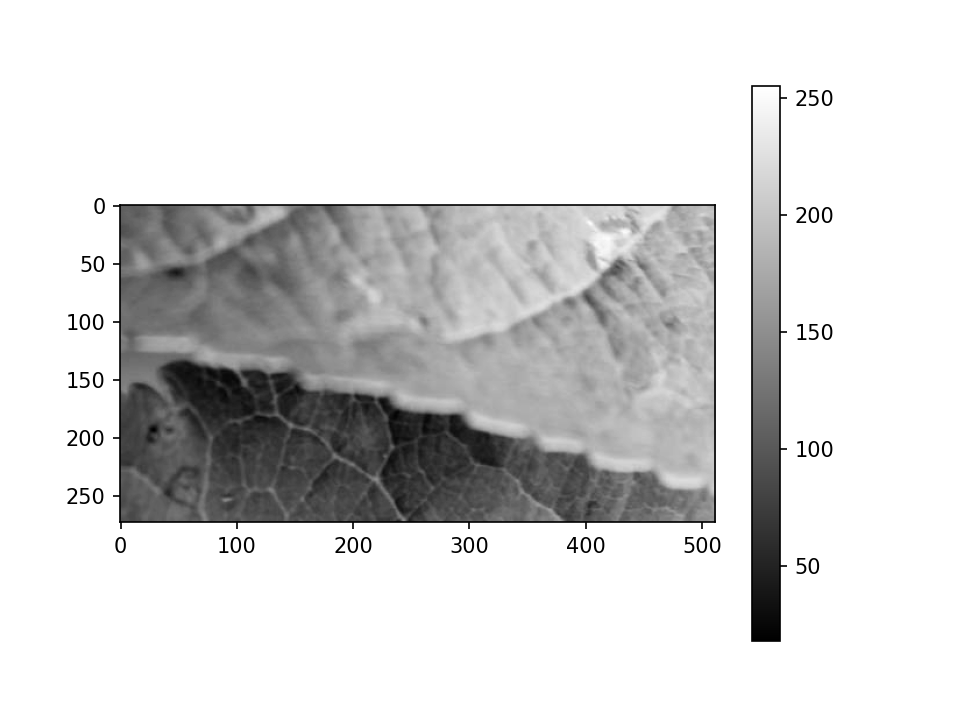

In [138]:
plt.figure()
plt.imshow(blocks[0][2], cmap='gray')
plt.colorbar()
plt.show()

In [185]:
out = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
m=0
for i in range(0,5):
    for k in range(0,4):
        out[m]=cv.normalize(blocks[i][k].astype("uint8"),None,0.0,255,cv.NORM_MINMAX)
        m+=1

<IPython.core.display.Javascript object>


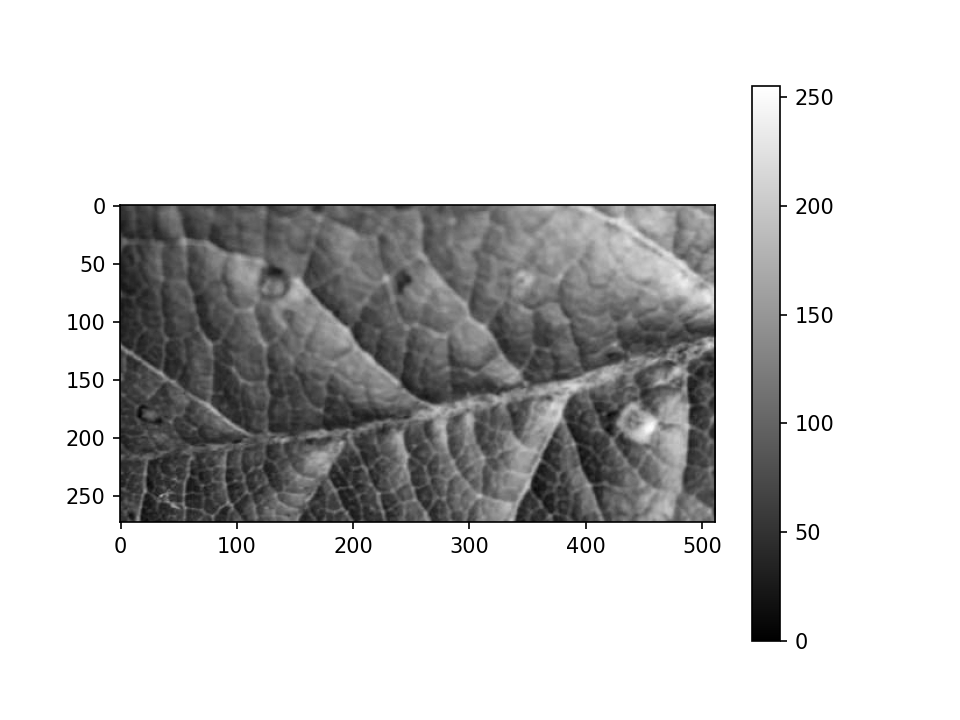

In [186]:
plt.figure()
plt.imshow(out[9], cmap='gray')
plt.colorbar()
plt.show()

In [187]:
abssobelx = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
abssobely = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sobel = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
temp = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,20):
    filter=np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) 
    temp[i] = cv.filter2D(out[i],-1,filter)
    abssobelx[i]=abs(temp[i]) 
    filter=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    temp[i] = cv.filter2D(out[i],-1,filter)
    abssobely[i]=abs(temp[i])
    sobel[i]=abssobelx[i]+abssobely[i]


<IPython.core.display.Javascript object>


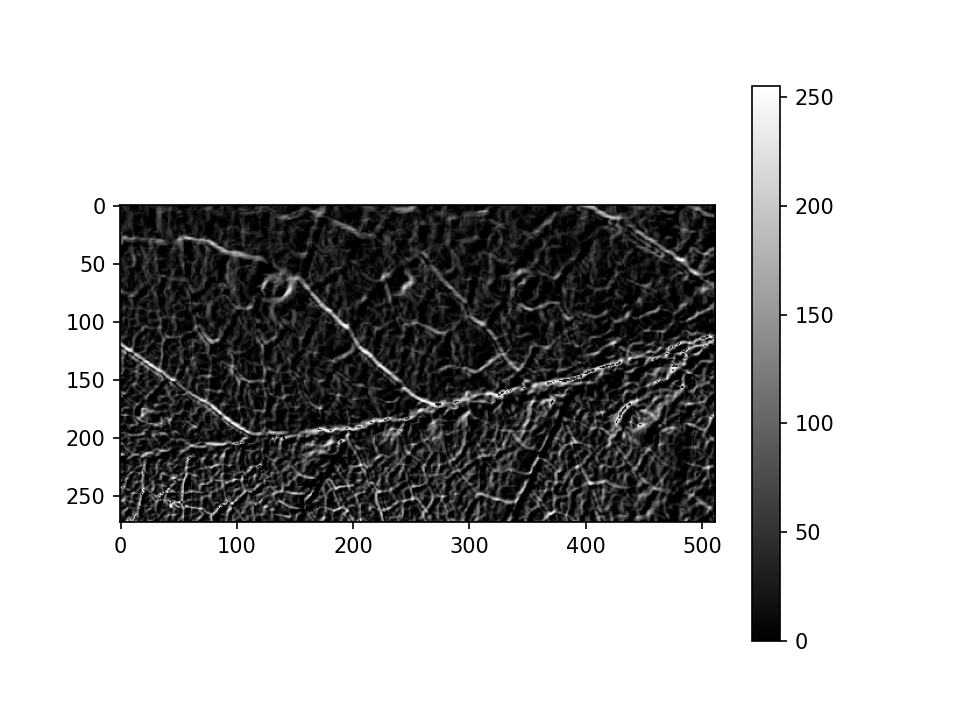

In [188]:
plt.figure()
plt.imshow(sobel[9], cmap='gray')
plt.colorbar()
plt.show()

In [219]:
tophat = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
filterSize =(30, 30)
kernel = cv.getStructuringElement(cv.MORPH_RECT, filterSize)

for i in range(0,20):
    tophat[i] = cv.morphologyEx(sobel[i], cv.MORPH_BLACKHAT, kernel)

<IPython.core.display.Javascript object>


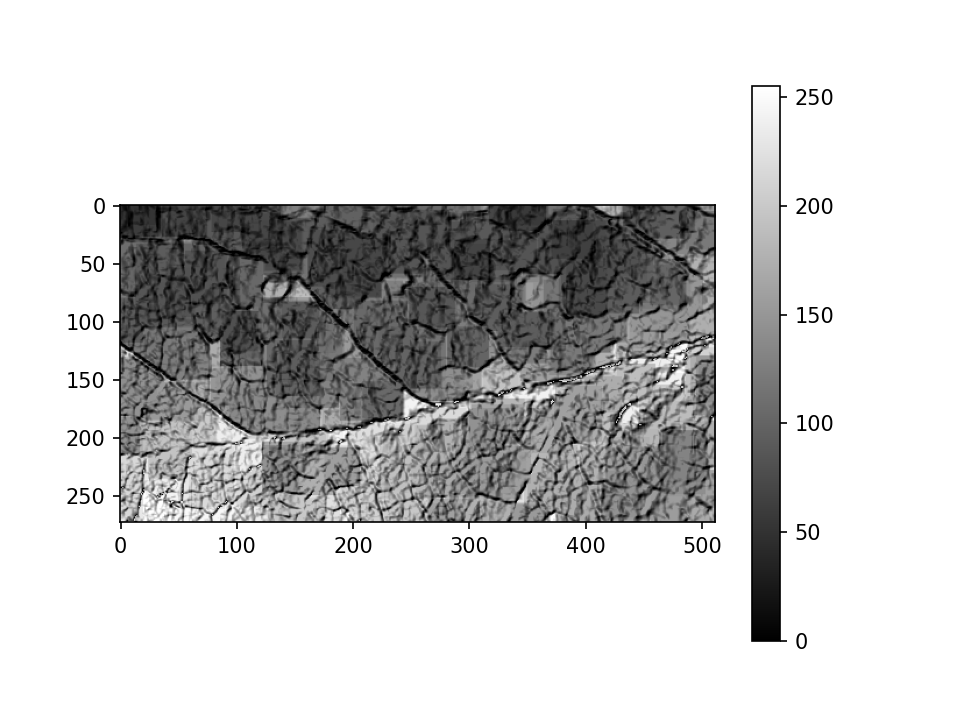

In [220]:
plt.figure()
plt.imshow(tophat[9], cmap='gray')
plt.colorbar()
plt.show()

In [221]:
th3 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
blur = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,20):
    blur[i] = cv.GaussianBlur(tophat[i],(5,5),0)
    ret3,th3[i] = cv.threshold(blur[i],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

<IPython.core.display.Javascript object>


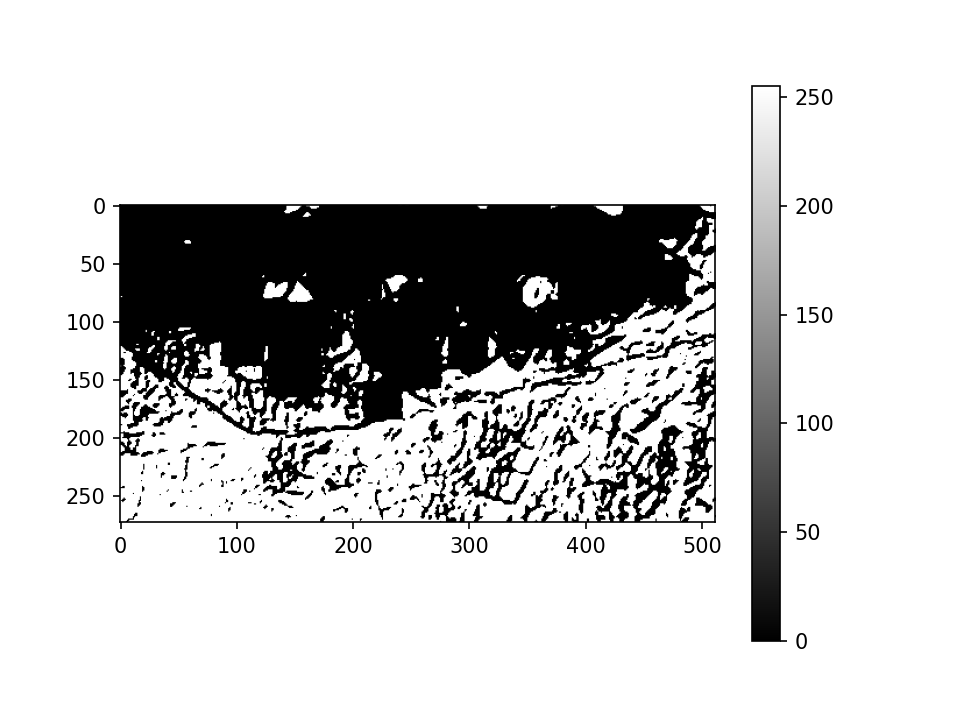

In [222]:
plt.figure()
plt.imshow(th3[9], cmap='gray')
plt.colorbar()
plt.show()